# Diabetes Predictor Model - Exploratory Data Analysis

#### In the last 'Data Wrangling' notebook, we took a look at the Diabetes dataset for completeness and cleaned up the column of the target variable (DiabetesDiagnosis). 

#### In this notebook we will:
#### 1. Explore each individual variable in the dataset
#### 2. Assess the relationship between each variable and the target
#### 3. Assess interactions between variables

In [1]:
# Importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

#show plots inline
%matplotlib inline

In [2]:
# Supress future warnings

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
# Loading the dataset

df = pd.read_csv('cleaned_diabetes_df.csv')

In [4]:
# Looking at the shape and first few rows of dataset

print(df.shape)
print(df.head())

(253680, 22)
  DiabetesDiagnosis  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0          diabetes     1.0       1.0        1.0  25.0     0.0     0.0   
1          diabetes     0.0       0.0        1.0  29.0     0.0     0.0   
2          diabetes     1.0       1.0        1.0  35.0     1.0     0.0   
3          diabetes     1.0       0.0        1.0  31.0     0.0     0.0   
4          diabetes     1.0       1.0        1.0  26.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   1.0           1.0     1.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     0.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      2.0       0.0       0.0     

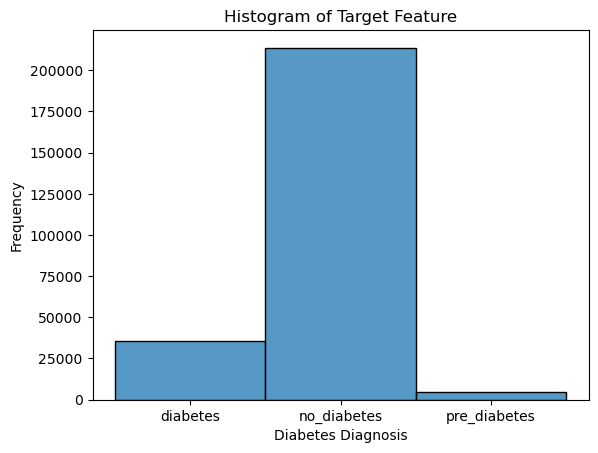

In [5]:
# Creating a univariate chart of my target (DiabetesDiagnosis)
# Creating a Histogram in this instance

sns.histplot(df['DiabetesDiagnosis'], bins=30, kde=False, discrete=True)
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Frequency')
plt.title('Histogram of Target Feature')
plt.show()

### Creating Bivariate Charts to Compare Each Feature to the Target Feature

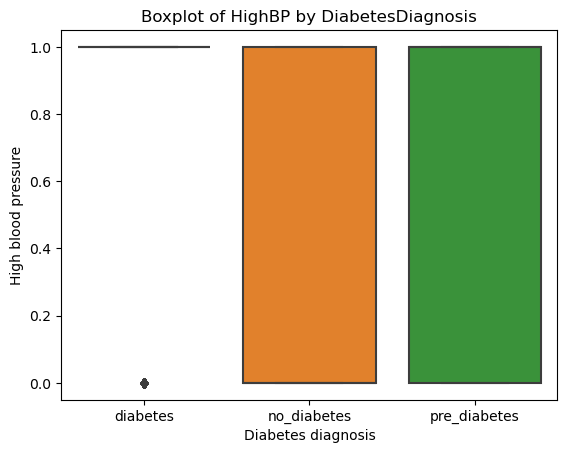

In [12]:
# Have you ever been told by a health professional that you have had high blood pressure?
# 0 = no high blood pressure
# 1 = high blood pressure

sns.boxplot(x='DiabetesDiagnosis', y='HighBP', data=df)
plt.xlabel('Diabetes diagnosis')
plt.ylabel('High blood pressure')
plt.title('Boxplot of HighBP by DiabetesDiagnosis')
plt.show()

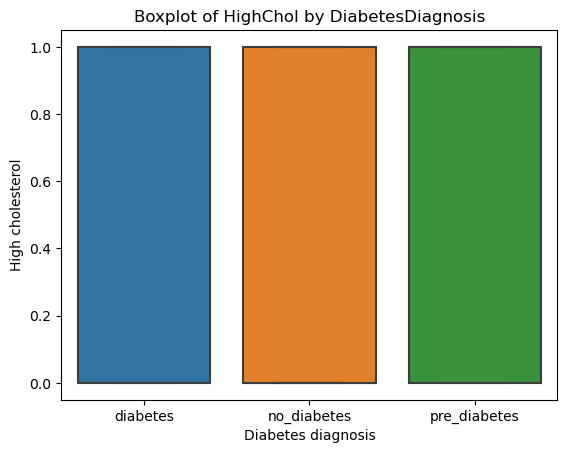

In [14]:
# Have you ever been told by a health professional that your blood cholesterol is high?
# 0 = no high cholesterol
# 1 = high cholesterol

sns.boxplot(x='DiabetesDiagnosis', y='HighChol', data=df)
plt.xlabel('Diabetes diagnosis')
plt.ylabel('High cholesterol')
plt.title('Boxplot of HighChol by DiabetesDiagnosis')
plt.show()

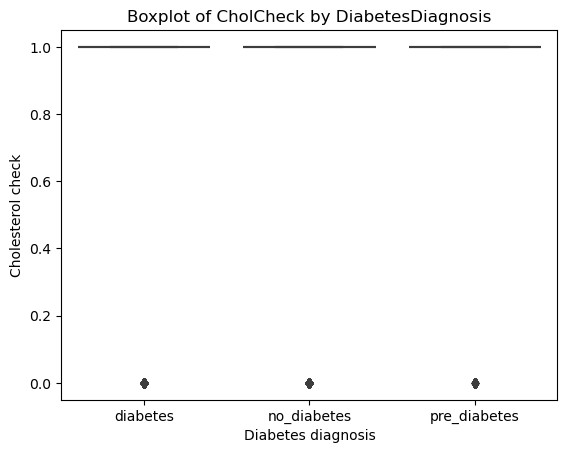

In [16]:
# Have you had your cholesterol checked within the past 5 years?
# 0 = no, cholesterol check in 5 years
# 1 = yes, cholesterol check in 5 years

sns.boxplot(x='DiabetesDiagnosis', y='CholCheck', data=df)
plt.xlabel('Diabetes diagnosis')
plt.ylabel('Cholesterol check')
plt.title('Boxplot of CholCheck by DiabetesDiagnosis')
plt.show()

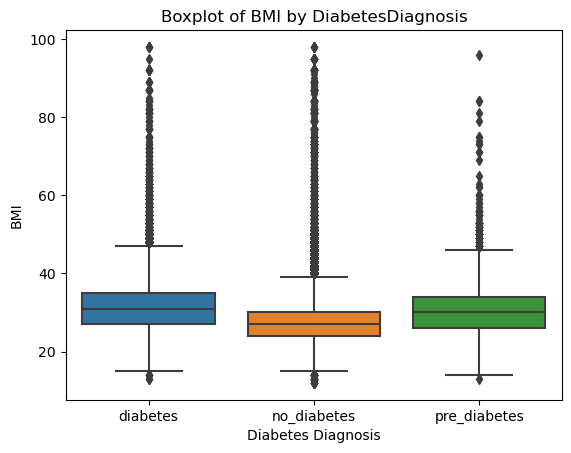

In [18]:
# Continuous variable of BMI (Body Mass Index) number

sns.boxplot(x='DiabetesDiagnosis', y='BMI', data=df)
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('BMI')
plt.title('Boxplot of BMI by DiabetesDiagnosis')
plt.show()

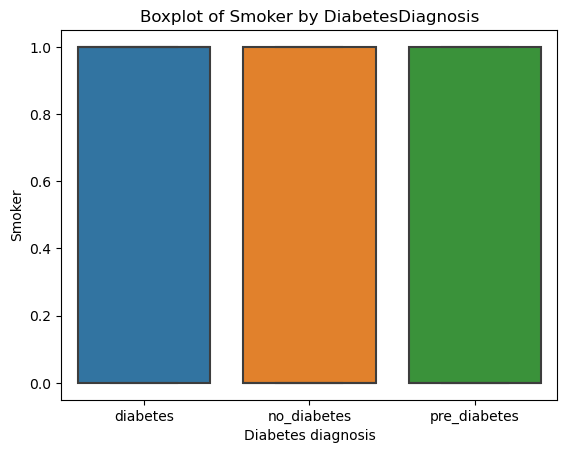

In [20]:
# Have you smoked at least 100 cigarettes in your entire life? (5 packs is equal to 100 cigarettes)
# 0 = no
# 1 = yes

sns.boxplot(x='DiabetesDiagnosis', y='Smoker', data=df)
plt.xlabel('Diabetes diagnosis')
plt.ylabel('Smoker')
plt.title('Boxplot of Smoker by DiabetesDiagnosis')
plt.show()

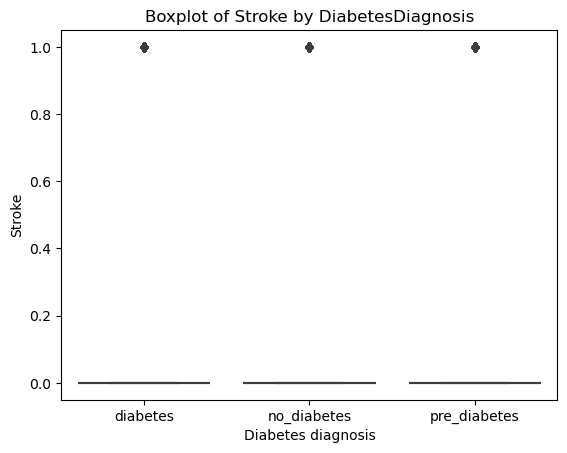

In [22]:
# Have you ever been told you have had a stroke?
# 0 = no
# 1 = yes

sns.boxplot(x='DiabetesDiagnosis', y='Stroke', data=df)
plt.xlabel('Diabetes diagnosis')
plt.ylabel('Stroke')
plt.title('Boxplot of Stroke by DiabetesDiagnosis')
plt.show()

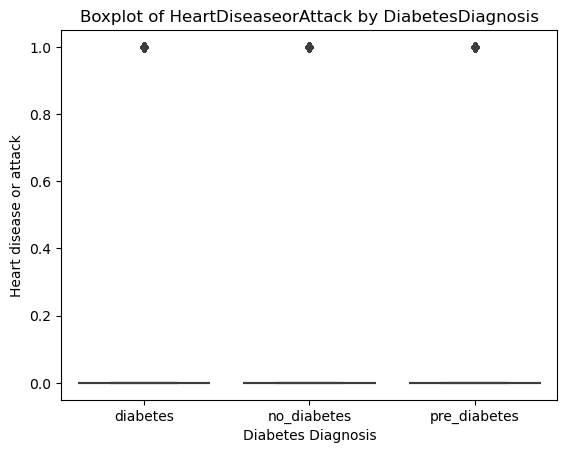

In [24]:
# Have you ever had/have Coronary Heart Disease (CHD) OR have you ever had a Myocardial Infarction (MI)
# 0 = no
# 1 = yes

sns.boxplot(x='DiabetesDiagnosis', y='HeartDiseaseorAttack', data=df)
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Heart disease or attack')
plt.title('Boxplot of HeartDiseaseorAttack by DiabetesDiagnosis')
plt.show()

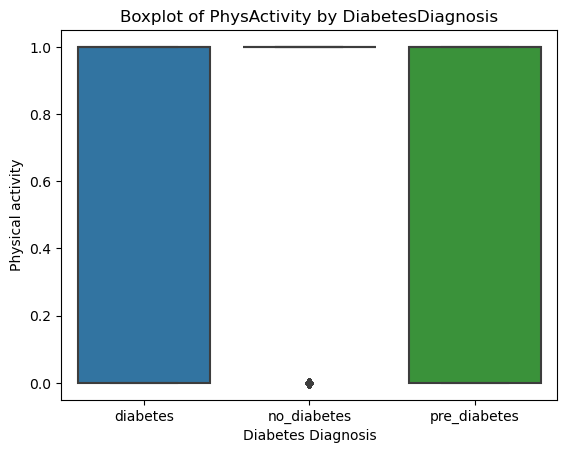

In [26]:
# Have you had any physical activity or exercise during the past 30 days? Not including your job
# 0 = no
# 1 = yes

sns.boxplot(x='DiabetesDiagnosis', y='PhysActivity', data=df)
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Physical activity')
plt.title('Boxplot of PhysActivity by DiabetesDiagnosis')
plt.show()

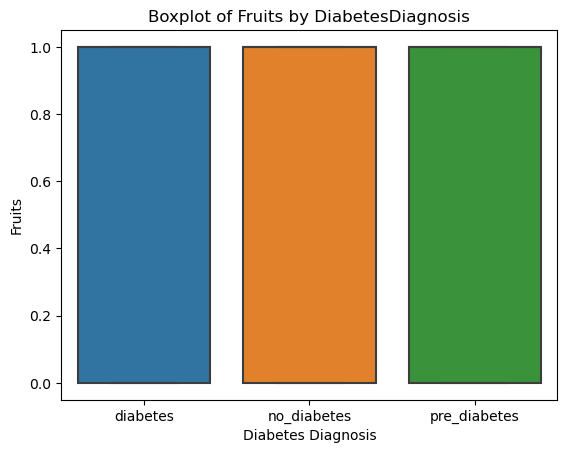

In [28]:
# Do you consume fruit 1 or more times per day?
# 0 = no
# 1 = yes

sns.boxplot(x='DiabetesDiagnosis', y='Fruits', data=df)
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Fruits')
plt.title('Boxplot of Fruits by DiabetesDiagnosis')
plt.show()

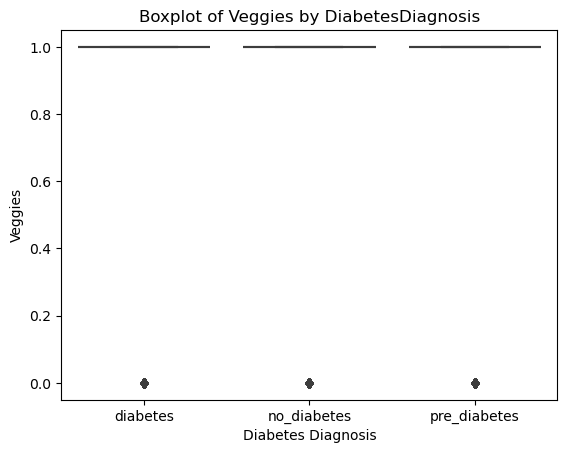

In [30]:
# Do you consume vegetables 1 or more times per day?
# 0 = no
# 1 = yes

sns.boxplot(x='DiabetesDiagnosis', y='Veggies', data=df)
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Veggies')
plt.title('Boxplot of Veggies by DiabetesDiagnosis')
plt.show()

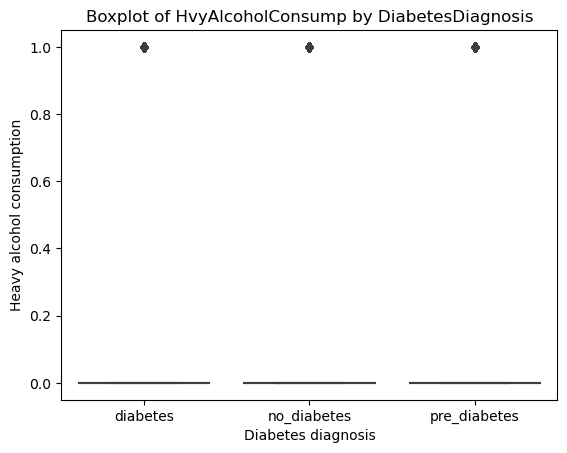

In [32]:
# Are you a heavy drinker? Adult men having more than 14 drinks per week. Adult women having more than 7 drinks per week.
# 0 = no
# 1 = yes

sns.boxplot(x='DiabetesDiagnosis', y='HvyAlcoholConsump', data=df)
plt.xlabel('Diabetes diagnosis')
plt.ylabel('Heavy alcohol consumption')
plt.title('Boxplot of HvyAlcoholConsump by DiabetesDiagnosis')
plt.show()

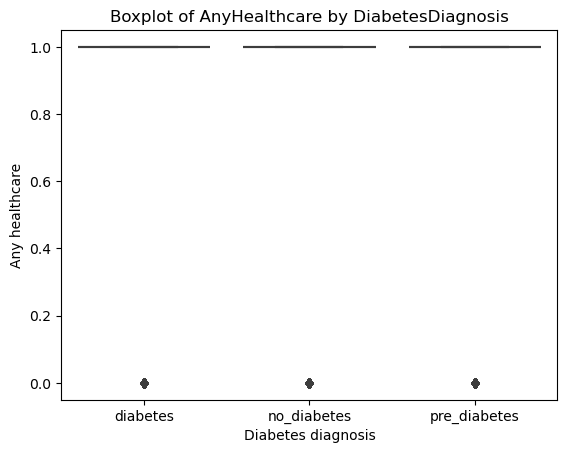

In [34]:
# Do you have any kind of healthcare coverage? Including health insurance, prepaid plans such as HMO, etc?
# 0 = no
# 1 = yes

sns.boxplot(x='DiabetesDiagnosis', y='AnyHealthcare', data=df)
plt.xlabel('Diabetes diagnosis')
plt.ylabel('Any healthcare')
plt.title('Boxplot of AnyHealthcare by DiabetesDiagnosis')
plt.show()

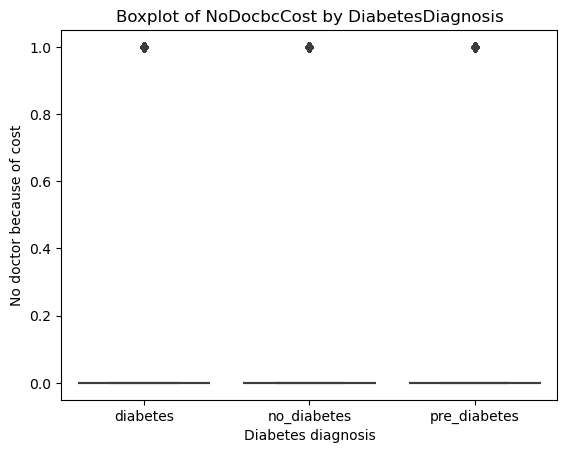

In [36]:
# Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
# 0 = no
# 1 = yes

sns.boxplot(x='DiabetesDiagnosis', y='NoDocbcCost', data=df)
plt.xlabel('Diabetes diagnosis')
plt.ylabel('No doctor because of cost')
plt.title('Boxplot of NoDocbcCost by DiabetesDiagnosis')
plt.show()

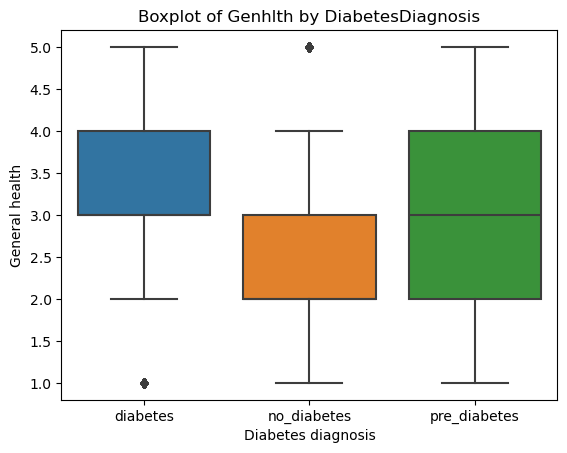

In [38]:
# Would you say that in general your health is 1-5 scale. 
# 1 = excellent
# 2 = very good
# 3 = good
# 4 = fair
# 5 = poor

sns.boxplot(x='DiabetesDiagnosis', y='GenHlth', data=df)
plt.xlabel('Diabetes diagnosis')
plt.ylabel('General health')
plt.title('Boxplot of Genhlth by DiabetesDiagnosis')
plt.show()

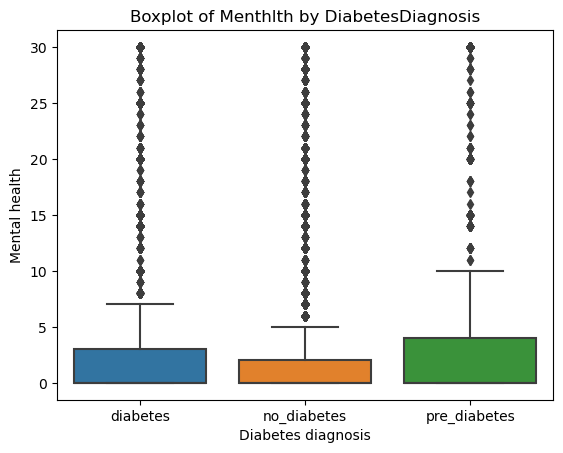

In [40]:
# Thinking about your mental health which includes stress, depression, and problems with emotions...
# How many days during the past 30 days was your mental health not good?
# Scale of 1-30 days

sns.boxplot(x='DiabetesDiagnosis', y='MentHlth', data=df)
plt.xlabel('Diabetes diagnosis')
plt.ylabel('Mental health')
plt.title('Boxplot of Menthlth by DiabetesDiagnosis')
plt.show()

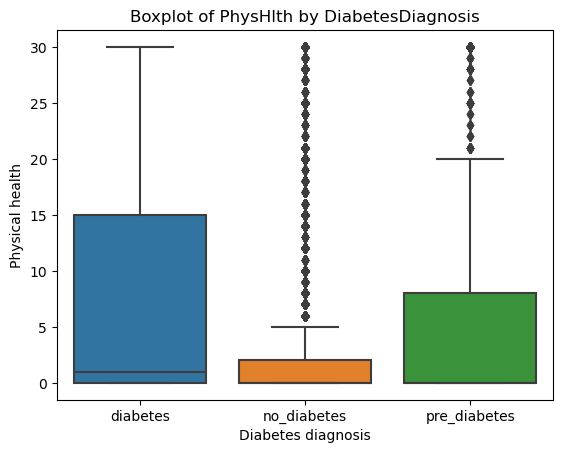

In [42]:
# Thinking of your physical health which includes physical illness and injury...
# How many days during the past 30 days was your physical health not good?
# Scale of 1-30 days

sns.boxplot(x='DiabetesDiagnosis', y='PhysHlth', data=df)
plt.xlabel('Diabetes diagnosis')
plt.ylabel('Physical health')
plt.title('Boxplot of PhysHlth by DiabetesDiagnosis')
plt.show()

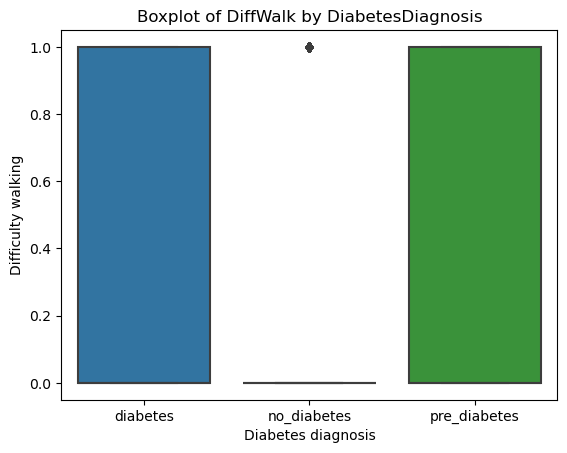

In [44]:
# Do you have serious difficulty walking or climbing stairs?
# 0 = no
# 1 = yes

sns.boxplot(x='DiabetesDiagnosis', y='DiffWalk', data=df)
plt.xlabel('Diabetes diagnosis')
plt.ylabel('Difficulty walking')
plt.title('Boxplot of DiffWalk by DiabetesDiagnosis')
plt.show()

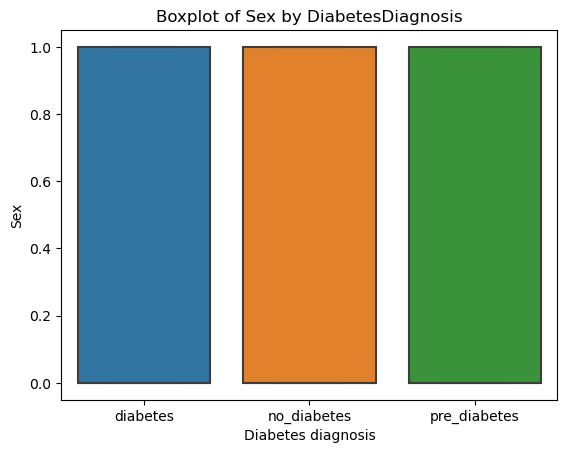

In [46]:
# What is your gender?
# 0 = female
# 1 = male

sns.boxplot(x='DiabetesDiagnosis', y='Sex', data=df)
plt.xlabel('Diabetes diagnosis')
plt.ylabel('Sex')
plt.title('Boxplot of Sex by DiabetesDiagnosis')
plt.show()

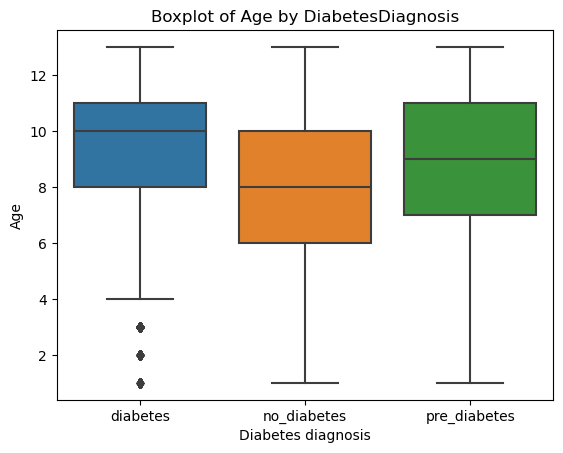

In [48]:
# What is your age?
# 1 = 18-24
# 2 = 25-29
# 3 = 30-34
# 4 = 35-39
# 5 = 40-44
# 6 = 45-49
# 7 = 50-54
# 8 = 55-59
# 9 = 60-64
# 10 = 65-69
# 11 = 70-74
# 12 = 75-79
# 13 = 80 or older

sns.boxplot(x='DiabetesDiagnosis', y='Age', data=df)
plt.xlabel('Diabetes diagnosis')
plt.ylabel('Age')
plt.title('Boxplot of Age by DiabetesDiagnosis')
plt.show()

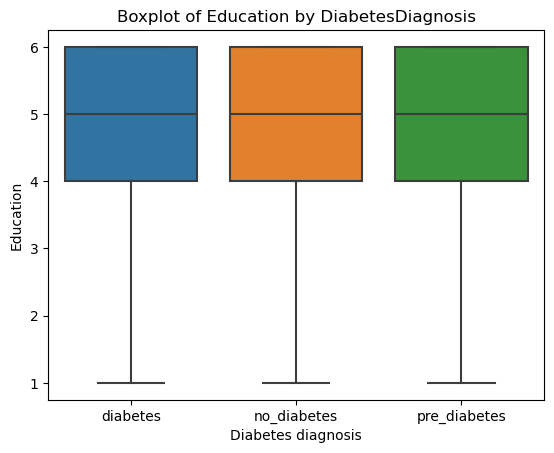

In [50]:
# What is your education level?
# 1 = never attended school or only kindergarten
# 2 = grades 1-8 (elementary)
# 3 = grades 9-12 (some high school)
# 4 = grades 12 or GED (high school graduate)
# 5 = college 1 year to 3 years (some college or technical school)
# 6 = college 4 years or more (college graduate)

sns.boxplot(x='DiabetesDiagnosis', y='Education', data=df)
plt.xlabel('Diabetes diagnosis')
plt.ylabel('Education')
plt.title('Boxplot of Education by DiabetesDiagnosis')
plt.show()

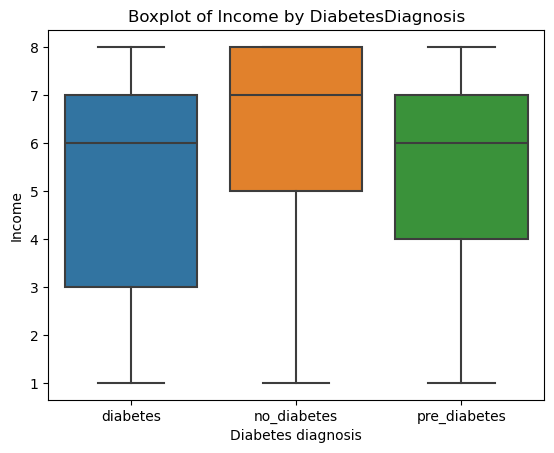

In [52]:
# What is your income level?
# 1 = less than $10,000
# 2 = less than $15,000
# 3 = less than $20,000
# 4 = less than $25,000
# 5 = less than $35,000
# 6 = less than $50,000
# 7 = less than $75,000
# 8 = $75,000 or more

sns.boxplot(x='DiabetesDiagnosis', y='Income', data=df)
plt.xlabel('Diabetes diagnosis')
plt.ylabel('Income')
plt.title('Boxplot of Income by DiabetesDiagnosis')
plt.show()

### Building Correlation Heatmap of All Features and Target Feature

In [55]:
# Extracting features and target 
# target = dependent variable
# features = dataframe of numerical features (independent variables)

target = df['DiabetesDiagnosis']
features = df.drop(columns=['DiabetesDiagnosis'])

from sklearn.feature_selection import f_classif

In [57]:
# Compute ANOVA F-statistic for each numerical feature relative to the categorical target'
# What is ANOVA statistic? It measures the variance between groups vs. the variance within groups
# A higher F-statistic means that the feature is more relevant in distinguishing categories in 'target'

# p-values were ignored using "_" since we are not using them in this step

anova_values, _ = f_classif(features, target) 

# Create a DataFrame for correlation values

anova_results = pd.DataFrame(anova_values, index=features.columns, columns=['ANOVA F-Score'])

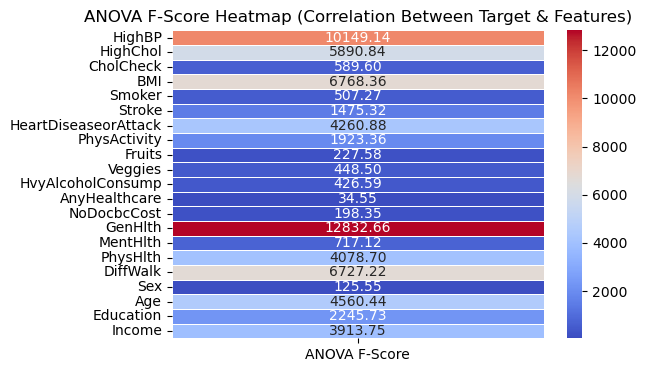

In [59]:
# Plot heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(anova_results, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.title('ANOVA F-Score Heatmap (Correlation Between Target & Features)')
plt.show()

#### An ANOVA F-Score Heatmap shows the relationship between a categorical target feature and the numerical features. 
#### The higher the F-score, the stronger association between the numerical feature and the categorical feature
#### The lower the F-score, the feature does not differentiate well across target categories

#### Based on the above heatmap, I can make an obersvation that...
#### High Blood Pressure, BMI, High Cholesterol, General Health, Difficulty Walking, Physical Health, and Age are the most storngly correlated variables with the target feature (Diabetes Diagnosis)

### Diving Deeper Into the Strong Correlations Discovered in the ANOVA F-Score Heatmap

In [64]:
# INPUT DIVING DEEPER INTO THE CORRELATIONS HERE
#plot scatter/line plot...skip this if i did it above...

### Using Random Forest to Get Feature Importance for the Features

In [67]:
# Loading the packages needed

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

In [69]:
# Since the target feature is categorical, encoding it into numerical labels

label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

In [71]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.25, random_state=42)

# X_train = training data (independent variables)
# X_test = testing data (independent variables)
# y_train = training labels (dependent variable)
# y_test = testing labels (dependent variable)

In [73]:
# Training the random forest classifer model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [75]:
# Getting feature importances 

importances = rf_model.feature_importances_

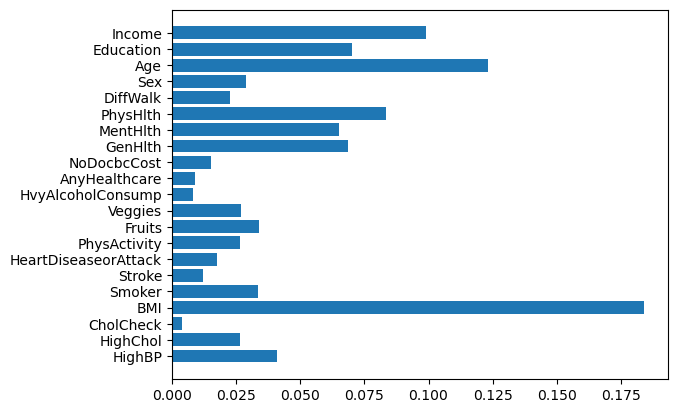

In [77]:
plt.barh(features.columns, importances)
plt.show()

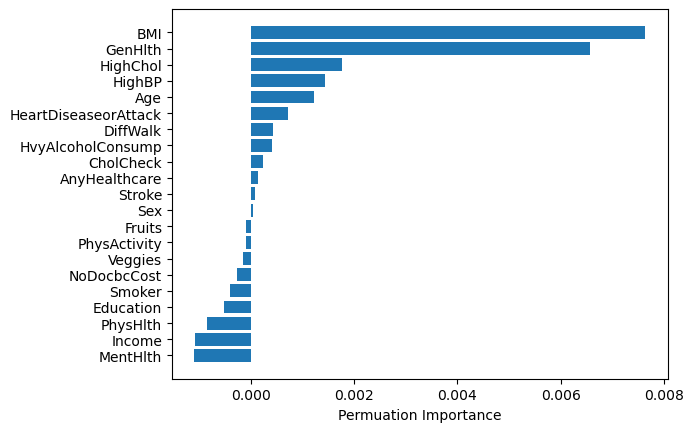

In [81]:
# Permutation based feature importance with scikit-learn to overcome drawbacks of default feature importance computed with mean impurity decrease

perm_importance = permutation_importance(rf_model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)

# Sorting feature importances

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('Permuation Importance')
plt.show()

### Findings

#### From my findings from the EDA portion of the data science pipeline revealed that the strongest positive correlations between my target feature and the numerical features are: BMI, General Health, High Cholesterol, and High Blood Pressure.

In [ ]:
# AUC and accuracy metric...AUC ROC score...
# try XG boost model also to see if RF is better or not....